# Nearest Correlation Matrices

This notebook looks at computing *nearest correlation matrices* using the NAG Library for *Python*.




## Correlation Matrices

* An $n$ by $n$ matrix is a correlation matrix if:
  * it is symmetric
  * it has ones on the diagonal 
  * its eigenvalues are non-negative (positive semidefinite)           
  
  
  $$ \Large Ax = \lambda x, \quad x \neq 0$$


* The element in the $i$th row and $j$th column is the correlation between the $i$th and $j$th variables. This could be stock process, for example.


## Empirical Correlation Matrices 

* Empirical correlation matrices are often **not mathematically true** due to inconsistent or missing data.


* Thus we are required to find a true correlation matrix, where our input, $G$, is an approximate correlation matrix.


* In particular we seek the *nearest* correlation matrix, in most cases.

## Computing Correlation Matrices

* The vector $p_i$, the $i$th column of a matrix, $P$,  holds the $m$ observations of the $i$th variable, of which there are $n$. $\bar{p}_i$ is the sample mean. 


$$ \large S_{ij}=\frac{1}{m-1}(p_i - \bar{p}_i )^T(p_j - \bar{p}_j) $$

* $S$ is a covariance matrix, with $S_{ij}$ the covariance   between variables $i$ and $j$


* $R$ is the corresponding correlation matrix, given by: 


\begin{align*} \large D_S^{1/2} & = \large \textrm{ diag}(s_{11}^{-1/2},s_{22}^{-1/2}, \ldots, s_{nn}^{-1/2}) \nonumber \\  &  \\
\large R & = \large D_S^{1/2} S D_S^{1/2} 
\end{align*}



## Approximate Correlation Matrices

* Now, what if we don't have all observations for each variable?


* We compute each covariance with observations that are available for *both* the *i*th and *j*th variable.


* For example NAG routine **library.correg.coeffs_pearson_miss_case**.


* We then compute the correlation matrix as before.





# Missing Stock Price Example

* Prices for 8 stocks on the first working day of 10 consecutive months.


|    | Stock A  | Stock B   | Stock C  | Stock D   | Stock E | Stock F  | Stock G   | Stock H
| ---     | ---     | ---     | ---     | ---     | ---     | ---     | ---     | ---     |
| **Month 1**  | 59.875 | 42.734 | 47.938 | 60.359 | 54.016 | 69.625 | 61.500 | 62.125 |
| **Month 2**  | 53.188 | 49.000 | 39.500 |        | 34.750 |        | 83.000 | 44.500 |
| **Month 3**  | 55.750 | 50.000 | 38.938 |        | 30.188 |        | 70.875 | 29.938 |
| **Month 4**  | 65.500 | 51.063 | 45.563 | 69.313 | 48.250 | 62.375 | 85.250 |        |
| **Month 5**  | 69.938 | 47.000 | 52.313 | 71.016 |        | 59.359 | 61.188 | 48.219 |
| **Month 6**  | 61.500 | 44.188 | 53.438 | 57.000 | 35.313 | 55.813 | 51.500 | 62.188 |
| **Month 7**  | 59.230 | 48.210 | 62.190 | 61.390 | 54.310 | 70.170 | 61.750 | 91.080 |
| **Month 8**  | 61.230 | 48.700 | 60.300 | 68.580 | 61.250 | 70.340 |        |        |
| **Month 9**  | 52.900 | 52.690 | 54.230 |        | 68.170 | 70.600 | 57.870 | 88.640 |
| **Month 10** | 57.370 | 59.040 | 59.870 | 62.090 | 61.620 | 66.470 | 65.370 | 85.840 |




* We will use NaNs where there is missing data.

* So our $P = \left[p_1, p_2, \ldots, p_n \right]$ is:


$$ 
P=\left[\begin{array}{rrrrrrrr}
   59.875 &  42.734 & {\color{blue}{47.938}} & {\color{blue}{60.359}} & 54.016 & 69.625 & 61.500 & 62.125 \\
   53.188 & 49.000 & 39.500 & \textrm{NaN} & 34.750 & \textrm{NaN} & 83.000 & 44.500 \\
   55.750 & 50.000 & 38.938 & \textrm{NaN} & 30.188 & \textrm{NaN} & 70.875 & 29.938 \\
   65.500 & 51.063 & {\color{blue}{45.563}} & {\color{blue}{69.313}} & 48.250 & 62.375 & 85.250  & \textrm{NaN} \\
   69.938 & 47.000 & {\color{blue}{52.313}} & {\color{blue}{71.016}} & \textrm{NaN} & 59.359 & 61.188 & 48.219 \\
   61.500 & 44.188 &  {\color{blue}{53.438}} & {\color{blue}{57.000}} & 35.313 & 55.813 & 51.500 & 62.188 \\
   59.230 & 48.210 & {\color{blue}{62.190}} & {\color{blue}{61.390}} & 54.310 & 70.170 & 61.750 &
   91.080 \\
   61.230 & 48.700 & {\color{blue}{60.300}} & {\color{blue}{68.580}} & 61.250 & 70.340 & \textrm{NaN} & \textrm{NaN} \\
   52.900 & 52.690 & 54.230 &  \textrm{NaN} & 68.170 & 70.600 & 57.870 & 88.640 \\
   57.370 & 59.040 & {\color{blue}{59.870}} & {\color{blue}{62.090}} & 61.620 & 66.470 & 65.370 &
   85.840
\end{array}\right]. 
$$


* And to compute the covariance between the 3rd and 4th variables: 


\begin{align*}  
\large v_1^T   & = \large [47.938, 45.563, 52.313, 53.438, 62.190, 60.300, 59.870]   \\
\large v_2^T   & = \large [60.359, 69.313, 71.016, 57.000, 61.390, 68.580, 62.090]   \\ 
S_{3,4}        & = \large \frac{1}{6} (v_1 - \bar{v}_1 )^T(v_2 - \bar{v}_2) 
\end{align*}

* Let's compute this in Python.


### Import required modules and set print options

In [1]:
import numpy as np
from naginterfaces.library import correg as nl_correg
import matplotlib.pyplot as plt
# Set the print precision
np.set_printoptions(precision=4, suppress=True)

In [2]:
# Select the display backend for Jupyter:
%matplotlib inline

### Initialize our *P* matrix of observations

In [3]:
# Define a 2-d array and use np.nan to set elements as NaNs
P = np.array([[59.875, 42.734, 47.938, 60.359, 54.016, 69.625, 61.500, 62.125],
              [53.188, 49.000, 39.500, np.nan, 34.750, np.nan, 83.000, 44.500],
              [55.750, 50.000, 38.938, np.nan, 30.188, np.nan, 70.875, 29.938],
              [65.500, 51.063, 45.563, 69.313, 48.250, 62.375, 85.250, np.nan],
              [69.938, 47.000, 52.313, 71.016, np.nan, 59.359, 61.188, 48.219],
              [61.500, 44.188, 53.438, 57.000, 35.313, 55.813, 51.500, 62.188],
              [59.230, 48.210, 62.190, 61.390, 54.310, 70.170, 61.750, 91.080],
              [61.230, 48.700, 60.300, 68.580, 61.250, 70.340, np.nan, np.nan],
              [52.900, 52.690, 54.230, np.nan, 68.170, 70.600, 57.870, 88.640],
              [57.370, 59.040, 59.870, 62.090, 61.620, 66.470, 65.370, 85.840]])
m, n = P.shape

### Compute the covariance, ignoring missing values

In [4]:
def cov_bar(P):
    """Returns an approximate sample covariance matrix"""
    # P.shape returns a tuple (m, n) that we unpack to m and n
    m, n = P.shape
    # Initialize an n-by-n zero matrix
    S = np.zeros((n, n))
    for i in range(n): 
        # Take the ith column
        xi = P[:, i]
        for j in range(i+1):
            # Take the jth column, where j <= i
            xj = P[:, j] 
            # Set mask such that all NaNs are True
            notp = np.isnan(xi) | np.isnan(xj) 
            # Apply the mask to xi
            xim = np.ma.masked_array(xi, mask=notp)
            # Apply the mask to xj
            xjm = np.ma.masked_array(xj, mask=notp) 
            S[i, j] = np.ma.dot(xim - np.mean(xim), xjm - np.mean(xjm))
            # Take the sum over ~notp to normalize
            S[i, j] = 1.0 / (sum(~notp) - 1) * S[i, j]
            S[j, i] = S[i, j]
    return S

In [5]:
def cor_bar(P):
    """Returns an approximate sample correlation matrix"""
    S = cov_bar(P)
    D = np.diag(1.0 / np.sqrt(np.diag(S)))
    return D @ S @ D 


### Compute the *approximate* correlation matrix

In [6]:
G = cor_bar(P)
print("The approximate correlation matrix \n{}".format(G))

The approximate correlation matrix 
[[ 1.     -0.325   0.1881  0.576   0.0064 -0.6111 -0.0724 -0.1589]
 [-0.325   1.      0.2048  0.2436  0.4058  0.273   0.2869  0.4241]
 [ 0.1881  0.2048  1.     -0.1325  0.7658  0.2765 -0.6172  0.9006]
 [ 0.576   0.2436 -0.1325  1.      0.3041  0.0126  0.6452 -0.321 ]
 [ 0.0064  0.4058  0.7658  0.3041  1.      0.6652 -0.3293  0.9939]
 [-0.6111  0.273   0.2765  0.0126  0.6652  1.      0.0492  0.5964]
 [-0.0724  0.2869 -0.6172  0.6452 -0.3293  0.0492  1.     -0.3983]
 [-0.1589  0.4241  0.9006 -0.321   0.9939  0.5964 -0.3983  1.    ]]


### Compute the eigenvalues of our (indefinite) *G*.

* We see below that our matrix $G$ is not a mathematically true correlation matrix.

In [7]:
print("Sorted eigenvalues of G {}".format(np.sort(np.linalg.eig(G)[0])))

Sorted eigenvalues of G [-0.2498 -0.016   0.0895  0.2192  0.7072  1.7534  1.9611  3.5355]


# Nearest Correlation Matrices

* Our problem now is to solve:


$$ 
\large  
\min \frac{1}{2} \| G-X \|^2_F = 
\min \frac{1}{2}  \sum_{i=1}^{n} \sum_{i=1}^{n} 
\left| G(i,j)-X(i,j) \right| ^2 
$$


* In order to find $X$, a true correlation matrix, where $G$ is an approximate correlation matrix.


* An algorithm by Qi and Sun (2006), applies an inexact Newton method to a dual (unconstrained) formulation of this problem.


* Improvements were suggested by Borsdorf and Higham (2010 MSc).


* It is globally and quadratically (fast!) convergent.


* This is implemented in NAG routine **library.correg.corrmat_nearest**.




## Using corrmat_nearest to compute the nearest correlation matrix in the Frobenius norm

In [8]:
# "Call NAG routine library.correg.corrmat_nearest and print the result
X, itr, _, _ = nl_correg.corrmat_nearest(G)
print("Nearest correlation matrix\n{}".format(X))

Nearest correlation matrix
[[ 1.     -0.3112  0.1889  0.5396  0.0268 -0.5925 -0.0621 -0.1921]
 [-0.3112  1.      0.205   0.2265  0.4148  0.2822  0.2915  0.4088]
 [ 0.1889  0.205   1.     -0.1468  0.788   0.2727 -0.6085  0.8802]
 [ 0.5396  0.2265 -0.1468  1.      0.2137  0.0015  0.6069 -0.2208]
 [ 0.0268  0.4148  0.788   0.2137  1.      0.658  -0.2812  0.8762]
 [-0.5925  0.2822  0.2727  0.0015  0.658   1.      0.0479  0.5932]
 [-0.0621  0.2915 -0.6085  0.6069 -0.2812  0.0479  1.     -0.447 ]
 [-0.1921  0.4088  0.8802 -0.2208  0.8762  0.5932 -0.447   1.    ]]


In [9]:
print("Sorted eigenvalues of X [{0}]".format(
    ''.join(
        ['{:.4f} '.format(x) for x in np.sort(np.linalg.eig(X)[0])]
    )
))

Sorted eigenvalues of X [-0.0000 -0.0000 0.0380 0.1731 0.6894 1.7117 1.9217 3.4661 ]


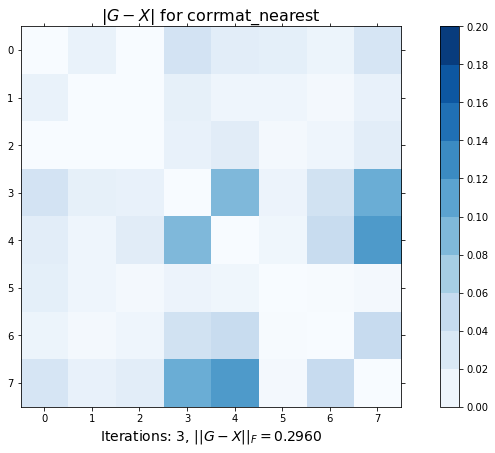

In [10]:
# Plot the difference between G and X as a small shaded square for each element
fig1, ax1 = plt.subplots(figsize=(14, 7))
cax1 = ax1.imshow(abs(X-G), interpolation='none', cmap=plt.cm.Blues, 
                  vmin=0, vmax=0.2)
cbar = fig1.colorbar(cax1, ticks = np.linspace(0.0, 0.2, 11, endpoint=True), 
                     boundaries=np.linspace(0.0, 0.2, 11, endpoint=True))
cbar.mappable.set_clim([0, 0.2])
ax1.tick_params(axis='both', which='both', 
                bottom='off', top='off', left='off', right='off', 
                labelbottom='off', labelleft='off')
ax1.set_title(r'$|G-X|$ for corrmat_nearest', fontsize=16)
plt.xlabel(
    r'Iterations: {0}, $||G-X||_F = {1:.4f}$'.format(itr, np.linalg.norm(X-G)),
    fontsize=14,
)
plt.show()

# Weighting rows and columns of elements

* Now, we note that for Stocks A to C we have a complete set of observations.


$$
P=\left[\begin{array}{rrrrrrrr}
  {\color{blue}{59.875}} & {\color{blue}{42.734}} & {\color{blue}{47.938}} & 60.359 & 54.016 & 69.625 & 61.500 & 62.125 \\
   {\color{blue}{53.188}} & {\color{blue}{49.000}} & {\color{blue}{39.500}} & \textrm{NaN} &  34.750 & \textrm{NaN} & 83.000 & 44.500 \\
   {\color{blue}{55.750}} & {\color{blue}{50.000}} & {\color{blue}{38.938}} & \textrm{NaN} & 30.188 & \textrm{NaN} & 70.875 & 29.938 \\
   {\color{blue}{65.500}} & {\color{blue}{51.063}} & {\color{blue}{45.563}} & 69.313 & 48.250 & 62.375 & 85.250 & \textrm{NaN} \\
   {\color{blue}{69.938}} & {\color{blue}{47.000}} & {\color{blue}{52.313}} & 71.016 & \textrm{NaN} & 59.359 & 61.188 & 48.219 \\
   {\color{blue}{61.500}} & {\color{blue}{44.188}} & {\color{blue}{53.438}} & 57.000 & 35.313 & 55.813 & 51.500 & 62.188 \\
   {\color{blue}{59.230}} & {\color{blue}{48.210}} & {\color{blue}{62.190}} & 61.390 & 54.310 & 70.170 & 61.750 & 91.080 \\
   {\color{blue}{61.230}} & {\color{blue}{48.700}} & {\color{blue}{60.300}} & 68.580 & 61.250 & 70.340  & \textrm{NaN} & \textrm{NaN} \\
   {\color{blue}{52.900}} & {\color{blue}{52.690}} & {\color{blue}{54.230}} & \textrm{NaN} & 68.170 & 70.600 & 57.870 & 88.640 \\
   {\color{blue}{57.370}} & {\color{blue}{59.040}} & {\color{blue}{59.870}} & 62.090 & 61.620  &66.470 & 65.370 & 85.840
\end{array}\right].
$$


* Perhaps we wish to preserve part of the correlation matrix?


* We could solve the *weighted* problem, NAG routine **library.correg.corrmat_nearest_bounded**


$$ \Large \|W^{\frac{1}{2}} (G-X) W^{\frac{1}{2}} \|_F$$ 


* Here $W$ is a diagonal matrix.


* We can also force the resulting matrix to be positive definite.



### Use corrmat_nearest_bounded to compute the nearest correlation matrix with row and column weighting

In [11]:
# Define an array of weights
W = np.array([10, 10, 10, 1, 1, 1, 1, 1], dtype = np.float64)

In [12]:
# Set up and call the NAG routine using weights and a minimum eigenvalue
opt = 'B'
alpha = 0.001
X, itr, _, _ = nl_correg.corrmat_nearest_bounded(G, opt, alpha, W)
print("Nearest correlation matrix using row and column weighting\n{}".format(X))

Nearest correlation matrix using row and column weighting
[[ 1.     -0.325   0.1881  0.5739  0.0067 -0.6097 -0.0722 -0.1598]
 [-0.325   1.      0.2048  0.2426  0.406   0.2737  0.287   0.4236]
 [ 0.1881  0.2048  1.     -0.1322  0.7661  0.2759 -0.6171  0.9004]
 [ 0.5739  0.2426 -0.1322  1.      0.2085 -0.089   0.5954 -0.1805]
 [ 0.0067  0.406   0.7661  0.2085  1.      0.6556 -0.278   0.8757]
 [-0.6097  0.2737  0.2759 -0.089   0.6556  1.      0.049   0.5746]
 [-0.0722  0.287  -0.6171  0.5954 -0.278   0.049   1.     -0.455 ]
 [-0.1598  0.4236  0.9004 -0.1805  0.8757  0.5746 -0.455   1.    ]]


In [13]:
print("Sorted eigenvalues of X [{0}]".format(
    ''.join(
        ['{:.4f} '.format(x) for x in np.sort(np.linalg.eig(X)[0])]
    )
))

Sorted eigenvalues of X [0.0010-0.0000j 0.0010+0.0000j 0.0305+0.0000j 0.1646+0.0000j 0.6764+0.0000j 1.7716+0.0000j 1.8910+0.0000j 3.4639+0.0000j ]


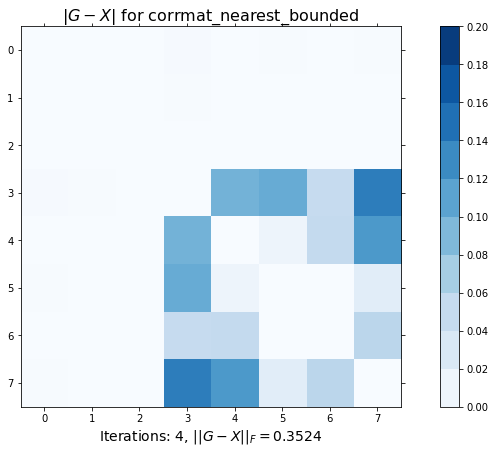

In [14]:
fig1, ax1 = plt.subplots(figsize=(14, 7))
cax1 = ax1.imshow(abs(X-G), interpolation='none', cmap=plt.cm.Blues, vmin=0, 
                  vmax=0.2)
cbar = fig1.colorbar(cax1, ticks = np.linspace(0.0, 0.2, 11, endpoint=True), 
                     boundaries=np.linspace(0.0, 0.2, 11, endpoint=True))
cbar.mappable.set_clim([0, 0.2])
ax1.tick_params(axis='both', which='both', 
                bottom='off', top='off', left='off', right='off', 
                labelbottom='off', labelleft='off')

ax1.set_title(r'$|G-X|$ for corrmat_nearest_bounded', fontsize=16)
plt.xlabel(
    r'Iterations: {0}, $||G-X||_F = {1:.4f}$'.format(itr, np.linalg.norm(X-G)),
    fontsize=14,
)                                         
plt.show()

# Weighting Individual Elements

* Would it be better to be able to *weight individual elements* in our approximate matrix?


* In our example the top left 3 by 3 block of exact correlations, perhaps.


* Element-wise weighting means we wish to find the minimum of


$$ \Large \|H \circ(G-X) \|_F $$ 


* So individually $h_{ij} \times (g_{ij} – x_{ij}).$


* However, this is a more “difficult” problem, and more computationally expensive. 


* This is implemented in the NAG routine **library.correg.corrmat_h_weight**.




### Use corrmat_h_weight to compute the nearest correlation matrix with element-wise weighting

In [15]:
# Set up a matrix of weights
H = np.ones([n, n])
H[:3, :3] = 100
H

array([[100., 100., 100.,   1.,   1.,   1.,   1.,   1.],
       [100., 100., 100.,   1.,   1.,   1.,   1.,   1.],
       [100., 100., 100.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.]])

In [16]:
# "Call the NAG routine specifying a minimum eigenvalue 
alpha = 0.001
X, itr, _ = nl_correg.corrmat_h_weight(G, alpha, H, maxit=200)
print("Nearest correlation matrix using element-wise weighting\n{}".format(X))

Nearest correlation matrix using element-wise weighting
[[ 1.     -0.3251  0.1881  0.5371  0.0255 -0.5893 -0.0625 -0.1929]
 [-0.3251  1.      0.2048  0.2249  0.4144  0.2841  0.2914  0.4081]
 [ 0.1881  0.2048  1.     -0.1462  0.7883  0.2718 -0.6084  0.8804]
 [ 0.5371  0.2249 -0.1462  1.      0.2138 -0.0002  0.607  -0.2199]
 [ 0.0255  0.4144  0.7883  0.2138  1.      0.6566 -0.2807  0.8756]
 [-0.5893  0.2841  0.2718 -0.0002  0.6566  1.      0.0474  0.593 ]
 [-0.0625  0.2914 -0.6084  0.607  -0.2807  0.0474  1.     -0.4471]
 [-0.1929  0.4081  0.8804 -0.2199  0.8756  0.593  -0.4471  1.    ]]


In [17]:
print("Sorted eigenvalues of X [{0}]".format(
    ''.join(
        ['{:.4f} '.format(x) for x in np.sort(np.linalg.eig(X)[0])]
    )
))

Sorted eigenvalues of X [0.0010 0.0010 0.0375 0.1734 0.6882 1.7106 1.9224 3.4660 ]


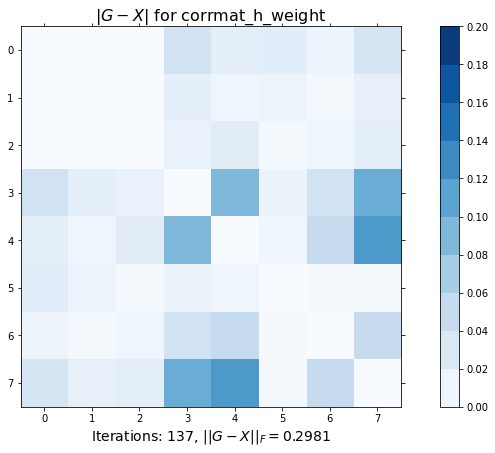

In [18]:
fig1, ax1 = plt.subplots(figsize=(14, 7))
cax1 = ax1.imshow(abs(X-G), interpolation='none', cmap=plt.cm.Blues, vmin=0, 
                  vmax=0.2)
cbar = fig1.colorbar(cax1, ticks = np.linspace(0.0, 0.2, 11, endpoint=True), 
                     boundaries=np.linspace(0.0, 0.2, 11, endpoint=True))
cbar.mappable.set_clim([0, 0.2])
ax1.tick_params(axis='both', which='both', 
                bottom='off', top='off', left='off', right='off', 
                labelbottom='off', labelleft='off')

ax1.set_title(r'$|G-X|$ for corrmat_h_weight', fontsize=16)
plt.xlabel(
    r'Iterations: {0}, $||G-X||_F = {1:.4f}$'.format(itr, np.linalg.norm(X-G)),
    fontsize=14,
)        
plt.show()

# Fixing a Block of Elements

* We probably really wish to *fix* our leading block of true correlations, so it does not change at all.


* We have the NAG routine **library.correg.corrmat_shrinking**.


* This routine fixes a leading block, which we require to be positive definite.


* We apply the *shrinking algorithm* of Higham, Strabić and Šego. The approach is **not** computationally expensive.


* What we find is the smallest α, such that *X* is a true correlation matrix:


$$ \large X =  \alpha \left( 
\begin{array}{ll}G_{11} & 0 \\ 0 & I \end{array} \right) +(1-\alpha)G, 
\qquad G = \left( 
\begin{array}{ll} G_{11} & G_{12} \\ G_{12}^T & G_{22} \end{array} 
\right) 
$$


* $G_{11}$ is the leading $k$ by $k$ block of the approximate correlation matrix that we wish to fix.


* $\alpha$ is in the interval $[0,1]$.



### Use corrmat_shrinking to compute the nearest correlation matrix with fixed leading block

In [19]:
# Call the NAG routine fixing the top 3-by-3 block
k = 3
X, alpha, itr, _, _ = nl_correg.corrmat_shrinking(G, k)
print("Nearest correlation matrix with fixed leading block \n{}".format(X))

Nearest correlation matrix with fixed leading block 
[[ 1.     -0.325   0.1881  0.4606  0.0051 -0.4887 -0.0579 -0.1271]
 [-0.325   1.      0.2048  0.1948  0.3245  0.2183  0.2294  0.3391]
 [ 0.1881  0.2048  1.     -0.106   0.6124  0.2211 -0.4936  0.7202]
 [ 0.4606  0.1948 -0.106   1.      0.2432  0.0101  0.516  -0.2567]
 [ 0.0051  0.3245  0.6124  0.2432  1.      0.532  -0.2634  0.7949]
 [-0.4887  0.2183  0.2211  0.0101  0.532   1.      0.0393  0.4769]
 [-0.0579  0.2294 -0.4936  0.516  -0.2634  0.0393  1.     -0.3185]
 [-0.1271  0.3391  0.7202 -0.2567  0.7949  0.4769 -0.3185  1.    ]]


In [20]:
print("Sorted eigenvalues of X [{0}]".format(
    ''.join(
        ['{:.4f} '.format(x) for x in np.sort(np.linalg.eig(X)[0])]
    )
))
print("Value of alpha returned: {:.4f}".format(alpha))

Sorted eigenvalues of X [0.0000 0.1375 0.2744 0.3804 0.7768 1.6263 1.7689 3.0356 ]
Value of alpha returned: 0.2003


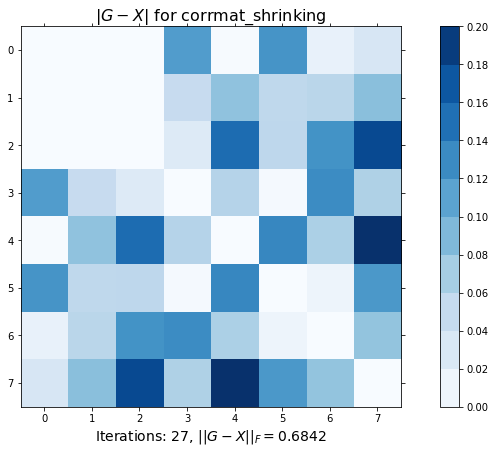

In [21]:
fig1, ax1 = plt.subplots(figsize=(14, 7))
cax1 = ax1.imshow(abs(X-G), interpolation='none', cmap=plt.cm.Blues, vmin=0, 
                  vmax=0.2)
cbar = fig1.colorbar(cax1, ticks = np.linspace(0.0, 0.2, 11, endpoint=True),
                     boundaries=np.linspace(0.0, 0.2, 11, endpoint=True))
cbar.mappable.set_clim([0, 0.2])
ax1.tick_params(axis='both', which='both', 
                bottom='off', top='off', left='off', right='off', 
                labelbottom='off', labelleft='off')

ax1.set_title(r'$|G-X|$ for corrmat_shrinking', fontsize=16)
plt.xlabel(
    r'Iterations: {0}, $||G-X||_F = {1:.4f}$'.format(itr, np.linalg.norm(X-G)),
    fontsize=14,
)        
plt.show()

# Fixing Arbitrary Elements

* The routine **library.correg.corrmat_target** fixes arbitrary elements by finding the smallest α, such that *X* is a true correlation matrix in:


$$ X = \large \alpha T+(1-\alpha)G, \quad T = H \circ G, \quad h_{ij} \in [0,1] $$


* A "1" in *H* fixes corresponding elements in *G*.


* $0 < h_{ij} < 1$ weights corresponding element in *G*.


* $\alpha$ is again in the interval $[0,1]$.



## Alternating Projections

* First method proposed to solve our original problem, however, it is very slow.


* The idea is we alternate projecting onto two sets, which are:
   * the set of smeidefinite matrices (S1), and 
   * matrices with unit diagonal (s2) 


* We do this until we converge on a matrix with both properties.

<img src = "alt_proj.png" width = "300">



## Alternating Projections with Anderson Acceleration


* A new approach by Higham and Strabić uses *Anderson Acceleration*, and makes the method worthwhile.


* In particular, we will be able to fix elements whilst finding the nearest true correlation matrix in the Frobenius norm.


* Our projections are now:
   * the set of (semi)definite matrices with some minimum eigenvalue, and 
   * matrix with elements $G_{i,j}$ for some given indices $i$ and $j$


* To appear in a future NAG Library.




# More on using the NAG Library for *Python*:


**https://www.nag.com/nag-library-python ** 
